In [5]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
#%matplotlib notebook
#%matplotlib qt5
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figure!


sns.set() # better looking figs


In [6]:
# our own set of small helper functions for plotting, etc
from utils import plot_embedding, plot_compare_embeddings, show_heatmap, plot_confusion_matrix

In [7]:
df = pd.read_csv("full-data.csv")
df["clipId"] = df["clipName"].apply(lambda x: x[-8:-6])

# re-order columns + keep only useful ones
df = df[['pptID',
 'fileName',
 'condition',
 'age',
 'gender',
 'nationality',
 'firstLang',
 'trial',
 'clipId',
 'freetext',
 'q01',
 'q02',
 'q03',
 'q04',
 'q05',
 'q06',
 'q07',
 'q08',
 'q09',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q24',
 'q25',
 'q26',
 'q27',
 'q28',
 'q29',
 'q30']]

df

,pptID,fileName,condition,age,gender,nationality,firstLang,trial,clipId,freetext,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,1,04,PLAY TOGETHER THE CARD GAME TO ENJOY THEM . IN...,...,2,2,1,2,1,2,2,2,2,2
1,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,2,09,PLAYING TOGETHER FOR TWO CHILDREN . TO PLAY CA...,...,3,4,3,3,3,4,3,4,3,3
2,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,3,16,PLAYING TOGETHER THE GAME. PLAY TO LEARNING TH...,...,3,4,3,3,3,3,3,4,3,3
3,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,4,02,PLAYING TO LEARNING TOGETHER. TO PLAY INTEREST...,...,3,4,3,3,2,2,3,3,3,3
4,94,10kinos8b34va6_data.csv,1,23,Male,American,English,1,15,I notice that they slow down towards the end m...,...,1,1,2,1,1,2,2,2,2,2
5,94,10kinos8b34va6_data.csv,1,23,Male,American,English,2,02,The child on the right seems to be taking over...,...,1,0,1,1,1,3,4,1,3,0
6,94,10kinos8b34va6_data.csv,1,23,Male,American,English,3,08,"Both seem pretty calm, but the child on the le...",...,4,1,4,1,2,1,1,2,3,2
7,94,10kinos8b34va6_data.csv,1,23,Male,American,English,4,11,These children seem to be working together pre...,...,1,1,1,1,1,1,2,2,1,1
8,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,1,12,They got along quite well and helped each othe...,...,0,4,3,2,2,4,2,2,4,2
9,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,2,07,They played separately largely. They were fine...,...,3,0,4,1,3,4,3,3,0,2


Rename `qXX` columns with the names of the actual constructs

In [8]:
constructs=["Sad", "Happy", "Angry", "Excited", "Calm", "Friendly", "Aggressive", "Engaged", "Distracted", "Bored", "Frustrated","Dominant","Submissive"]

index = df.columns.tolist()
index = index[0:10] + ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + [c for c1 in constructs for c in ['left' + c1, 'right' + c1]]
df.columns=index
df

,pptID,fileName,condition,age,gender,nationality,firstLang,trial,clipId,freetext,...,leftDistracted,rightDistracted,leftBored,rightBored,leftFrustrated,rightFrustrated,leftDominant,rightDominant,leftSubmissive,rightSubmissive
0,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,1,04,PLAY TOGETHER THE CARD GAME TO ENJOY THEM . IN...,...,2,2,1,2,1,2,2,2,2,2
1,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,2,09,PLAYING TOGETHER FOR TWO CHILDREN . TO PLAY CA...,...,3,4,3,3,3,4,3,4,3,3
2,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,3,16,PLAYING TOGETHER THE GAME. PLAY TO LEARNING TH...,...,3,4,3,3,3,3,3,4,3,3
3,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,4,02,PLAYING TO LEARNING TOGETHER. TO PLAY INTEREST...,...,3,4,3,3,2,2,3,3,3,3
4,94,10kinos8b34va6_data.csv,1,23,Male,American,English,1,15,I notice that they slow down towards the end m...,...,1,1,2,1,1,2,2,2,2,2
5,94,10kinos8b34va6_data.csv,1,23,Male,American,English,2,02,The child on the right seems to be taking over...,...,1,0,1,1,1,3,4,1,3,0
6,94,10kinos8b34va6_data.csv,1,23,Male,American,English,3,08,"Both seem pretty calm, but the child on the le...",...,4,1,4,1,2,1,1,2,3,2
7,94,10kinos8b34va6_data.csv,1,23,Male,American,English,4,11,These children seem to be working together pre...,...,1,1,1,1,1,1,2,2,1,1
8,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,1,12,They got along quite well and helped each othe...,...,0,4,3,2,2,4,2,2,4,2
9,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,2,07,They played separately largely. They were fine...,...,3,0,4,1,3,4,3,3,0,2


Compute, for each left/right constructs, the differences and sums. This gives us an insight on the inbalance of the given construct between the children, and the overall 'magnitude' of the construct in the clip.

In [9]:
for c in constructs:
    df["diff"+c] = abs(df["left" + c] - df["right" + c])
    df["sum"+c] = df["left" + c] + df["right" + c] - 4
    
# create 2 lists of columns names, one for left/right constructs, one for diff/sum constructs
columnsLeftRight=[]
columnsDiffSum=[]

for c in constructs:
    columnsLeftRight.append("left" + c)
    columnsLeftRight.append("right" + c)
    
    columnsDiffSum.append("diff" + c)
    columnsDiffSum.append("sum" + c)
    

df[df["condition"]==2].to_csv("data_fullscene.csv")
df[df["condition"]==1].to_csv("data_skel.csv")

# work with differences & sum for each constructs
selectedColumns=columnsDiffSum

## work with left child/right child for each constructs
#selectedColumns=columnsLeftRight

allQuestionsDiffSum = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsDiffSum
allQuestionsLeftRight = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsLeftRight
allQuestions = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + selectedColumns


*we define here several useful partial views of the main dataframe*

In [10]:
fullscene_df=df[df["condition"]==2] # full scene

# the responses to the 26 left/right Likert-scale questions
fullscene_ratings_df=fullscene_df[selectedColumns].astype(float)
fullscene=fullscene_ratings_df.values # the underlying numpy array

# clip names
fullscene_labels=fullscene_df["clipId"].values

# mean ratings per clip
fullscene_means=fullscene_df.groupby(["clipId"]).mean()[selectedColumns]


skel_df=df[df["condition"]==1] # skeleton

# the responses to the 26 left/right Likert-scale questions
skel_ratings_df=skel_df[selectedColumns].astype(float)
skel=skel_ratings_df.values # the underlying numpy array

# clip names
skel_labels=skel_df["clipId"].values

# mean ratings per clip
skel_means=skel_df.groupby(["clipId"]).mean()[selectedColumns]

In [11]:
meanvar_full_ratings=fullscene_df.groupby(["clipId"]).std()[columnsLeftRight].T.mean()
meanvar_skel_ratings=skel_df.groupby(["clipId"]).std()[columnsLeftRight].T.mean()

pd.DataFrame([meanvar_full_ratings,meanvar_skel_ratings],index=["mean stddev fullscene ratings","mean stddev skel ratings"]).T

,mean stddev fullscene ratings,mean stddev skel ratings
clipId,,
01,0.913077,1.068177
02,0.956018,0.984399
03,1.069666,0.916187
04,1.035666,1.056938
05,1.016512,0.936117
06,1.009450,0.939598
07,1.087390,1.037589
08,1.046094,0.956287
09,1.044294,1.018345


In [12]:
import krippendorff

krip={}

for clipName, group in fullscene_df[["clipId"] + allQuestionsLeftRight].groupby(["clipId"]):
    krip[clipName]=(krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

for clipName, group in skel_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
    krip[clipName]=krip[clipName] + (krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

    
krippendorff_df=pd.DataFrame.from_dict(krip,orient="index", columns=["alpha(fullscene)", "N(fullscene)", "alpha(skel)", "N(skel)"])

show_heatmap(krippendorff_df[["alpha(fullscene)", "alpha(skel)"]], cmap="summer")



,alpha(fullscene),alpha(skel)
01,0.446443,0.186386
02,0.18072,0.269889
03,0.392881,0.368891
04,0.44438,0.26173
05,0.327889,0.283435
06,0.46281,0.359461
07,0.0914201,0.235908
08,0.339198,0.311564
09,0.0974896,0.0578229
10,0.396426,0.0861424


Comparing the agreement scores in the fullscene vs skeleton-only videos, using a T-test:

In [13]:
from scipy.stats import ttest_ind

fullscene_krip = krippendorff_df["alpha(fullscene)"]
skel_krip = krippendorff_df["alpha(skel)"]

print('fullscene mean:', sum(fullscene_krip) / len(fullscene_krip))
print('skel mean:', sum(skel_krip) / len(skel_krip))

print(ttest_ind(fullscene_krip, skel_krip))

from statistics import mean, stdev
from math import sqrt
cohens_d = (mean(fullscene_krip) - mean(skel_krip)) / (sqrt((stdev(fullscene_krip) ** 2 + stdev(skel_krip) ** 2) / 2))

print('cohens d:', cohens_d)

fullscene mean: 0.32795503407453647
skel mean: 0.25168714306863765
Ttest_indResult(statistic=2.4549336766152607, pvalue=0.018781232333426823)
cohens d: 0.7763181922755465


# Latent constructs

The first step of the analysis looks at latent constructs.

Our initial data contains responses to 22 questions (ie, 22 degrees of freedom). The question is: can those 22 DoFs be grouped into a smaller number of *latent* constructs that would effectively encapsulate the differences observed in the reponses between video clips.

Three approaches are explored:
- Principal component analysis (PCA)
- Principal component analysis (purely for dimensionality reduction) followed by a linear discriminant analysis (LDA) that aims at maximising inter-class distances (ie, inter-clips ratings) while minimizing intra-class distances (ie, the differences between ratings for a given clip).
- Explorative Factor Analysis (EFA)

## PCA

In [14]:
from sklearn.decomposition import PCA

We compute the PCA transformation with the responses to the *fullscene* stimuli.

We then project both the *fullscene* and the *skeletal-only* responses in this PCA space, effectively reducing the dimensionality of our data from 22 to `nb_components` (ie, 6).

In [15]:
nb_components = 6

fullscene_pca_model=PCA(n_components=nb_components).fit(fullscene)

fullscene_pca = fullscene_pca_model.transform(fullscene)
fullscene_means_pca = fullscene_pca_model.transform(fullscene_means.values)

skel_pca_model = fullscene_pca_model

skel_pca = skel_pca_model.transform(skel)
skel_means_pca = skel_pca_model.transform(skel_means.values)

With 6 components, about 70% of the variance in the *fullscene* dataset is explained.

Cumulative explained variance: [0.32430671 0.44723373 0.54745441 0.61906194 0.67073193 0.70727606]


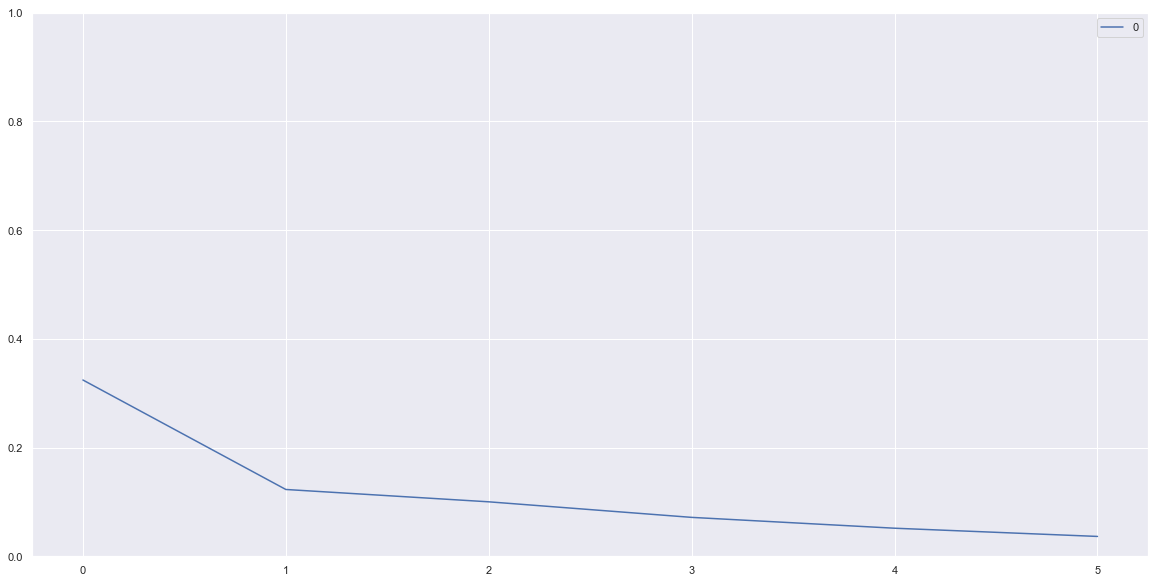

In [16]:
pd.DataFrame(fullscene_pca_model.explained_variance_ratio_).plot(ylim=[0,1])
print("Cumulative explained variance: %s" % fullscene_pca_model.explained_variance_ratio_.cumsum())

### Plotting of the embeding

`plot_embedding` plots each questionnaire's response when projected along the first 2 eigenvectors. Responses' colours correspond to the clips.

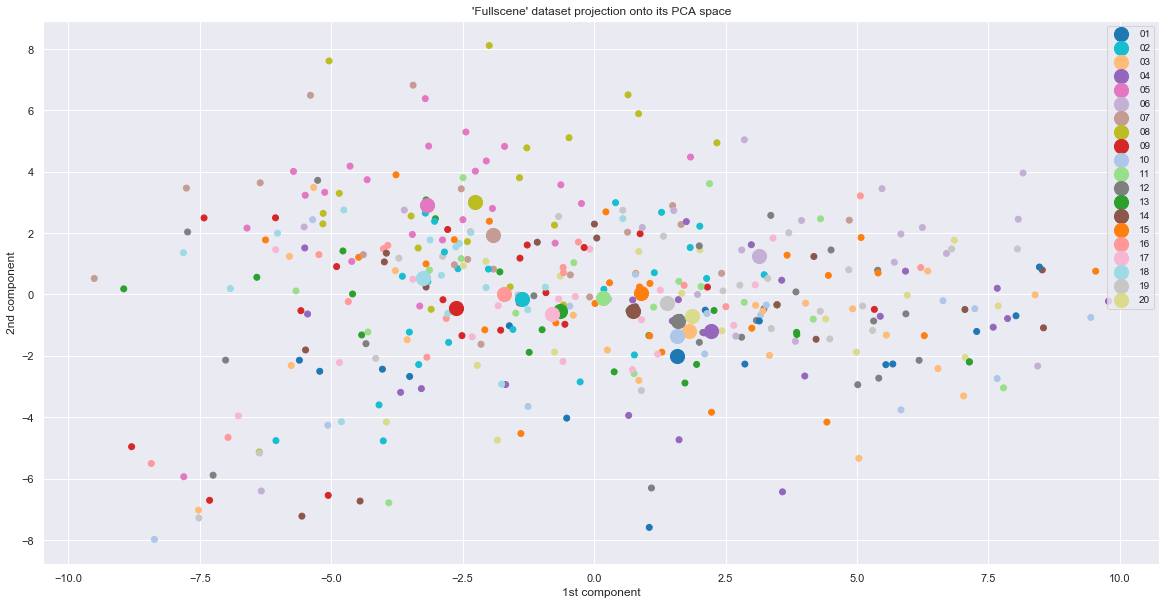

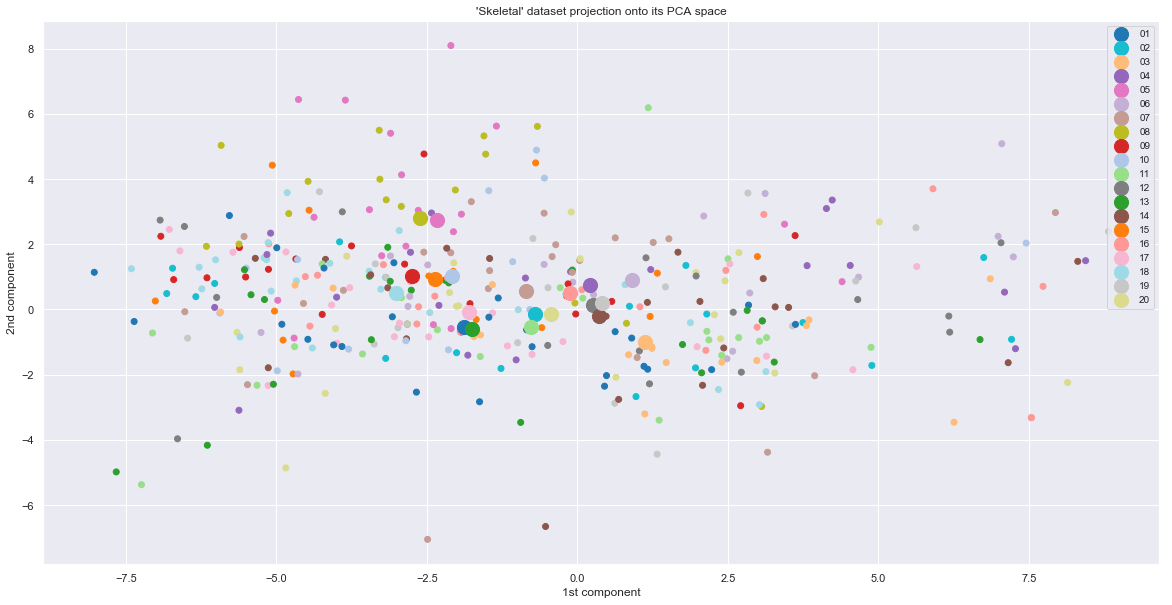

In [17]:
plot_embedding(fullscene_pca, fullscene_labels, fullscene_means_pca, fullscene_means.index, title="'Fullscene' dataset projection onto its PCA space", three_d=False)
plot_embedding(skel_pca, skel_labels, skel_means_pca, skel_means.index, title="'Skeletal' dataset projection onto its PCA space", three_d=False) 

For each clip, we can then plot the distance between its embedding based on fullscene ratings vs its embedding based on skeletal data only.

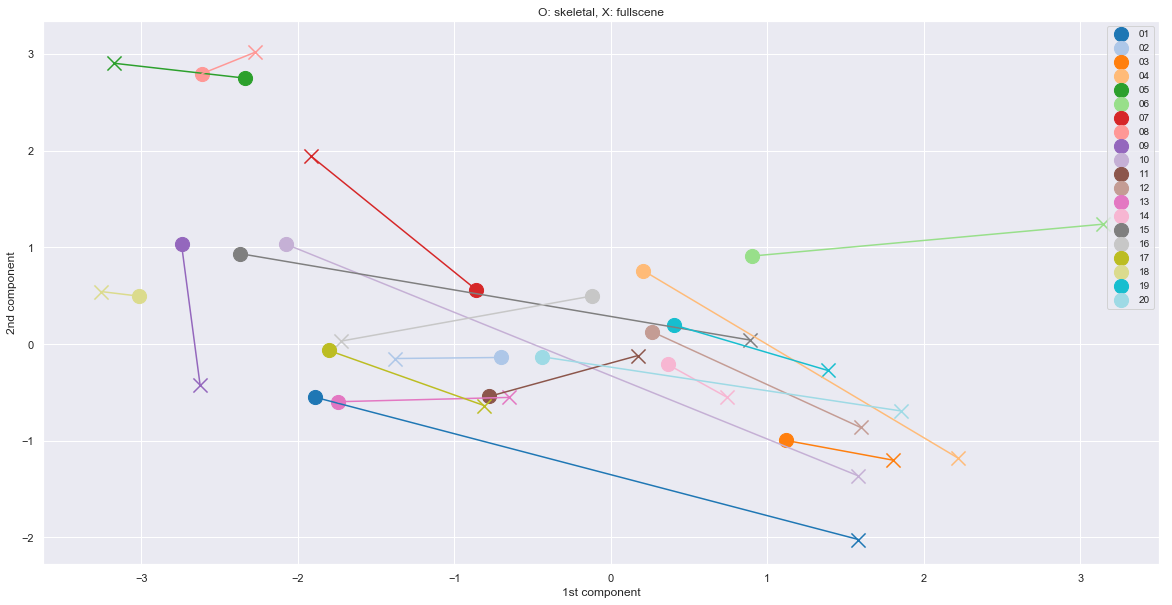

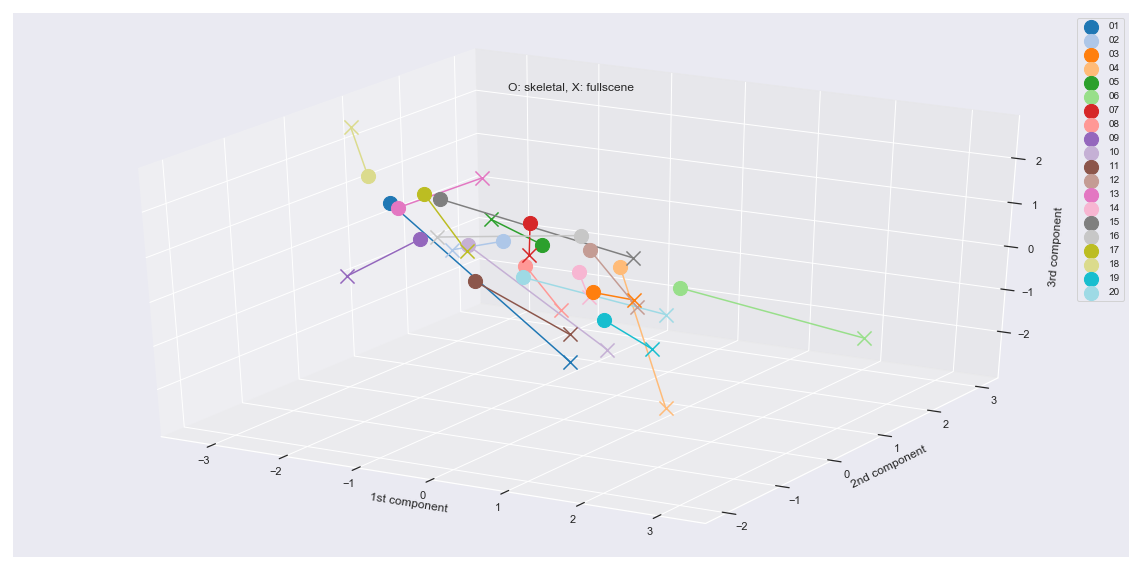

In [18]:
plot_compare_embeddings(skel_means_pca, fullscene_means_pca, skel_means.index, title="O: skeletal, X: fullscene", three_d=False)
plot_compare_embeddings(skel_means_pca, fullscene_means_pca, skel_means.index, title="O: skeletal, X: fullscene", three_d=True)

Computing the actual distance between clips in the two conditions shows that they are generally quite far apart. A straightforward PCA embedding does not seem to be effective to evidence similarities between our 2 conditions.

In [19]:
distances_pca=pd.DataFrame(np.power(np.sum(np.power(skel_means_pca - fullscene_means_pca, 2), axis=1), 0.5), index=skel_means.index, columns=["distance_pca"])
show_heatmap(distances_pca, cmap="summer_r")

,distance_pca
clipId,
01,4.65382
02,0.883654
03,1.73115
04,4.40108
05,1.2188
06,2.3967
07,2.65566
08,1.57035
09,1.54301


To answer the question: *does a PCA evidence common latent factors between our 2 conditions?*, we compute a PCA model *based on the skeletal data*, and compare the resulting PCA components with the ones found with the fullscene data.

We observe that the resulting loadings look very different.

In [20]:
# plot of PCA components, with fullscene vs skeleton components side-by-side


skel_pca_model=PCA(n_components=nb_components).fit(skel)

skel_pca = skel_pca_model.transform(skel)
skel_means_pca = skel_pca_model.transform(skel_means.values)



skel_pca_components = pd.DataFrame(skel_pca_model.components_,columns=columnsDiffSum).T
fullscene_pca_components = pd.DataFrame(fullscene_pca_model.components_,columns=columnsDiffSum).T

# merge PCA components into one dataframe, skel and fullscene side-by-side
pca_components=pd.concat([skel_pca_components, fullscene_pca_components], keys=["skel", "fullscene"], axis=1)
pca_components=pca_components.swaplevel(0,1,1).sort_index(1)


show_heatmap(pca_components[abs(pca_components)>0.2], m=-0.6, M=0.6)


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


## LDA

We perform the LDA *on top of the PCA* as LDA typically requires O > 3 F, with O the nb of observations and F the nb of features (here, we have ~26 observations for originally 22 questions). Using the PCA as a dimensionality reduction tool, we bring down the number of degrees of freedom to 6.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_nb_components = 4

fullscene_lda_model = LinearDiscriminantAnalysis(n_components=lda_nb_components, solver='svd')
fullscene_lda_model.fit(fullscene_pca, fullscene_labels)

fullscene_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(fullscene))
fullscene_means_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(fullscene_means.values))

skel_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(skel))
skel_means_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(skel_means.values))


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Attention: the variance explained by the LDA transformation is the variance in the *PCA* space, not in the original 22-D space of the questionnaire!

In [22]:
print("Cumulative explained variance by LDA: %s" % fullscene_lda_model.explained_variance_ratio_.cumsum())

Cumulative explained variance by LDA: [0.44107238 0.70979231 0.8487203  0.92541401]


When projected in the PDA space, the clips in condition *skeleton* vs *fullscene* are much closer to one another.

In [23]:
distances_lda=pd.DataFrame(np.power(np.sum(np.power(skel_means_lda - fullscene_means_lda, 2), axis=1), 0.5), index=skel_means.index, columns=["distance_lda"])

distances = pd.concat([distances_pca, distances_lda], axis=1)
show_heatmap(distances, cmap="summer_r")


,distance_pca,distance_lda
clipId,,
01,4.65382,1.78732
02,0.883654,0.350891
03,1.73115,1.03464
04,4.40108,2.42992
05,1.2188,0.486269
06,2.3967,0.679606
07,2.65566,1.27701
08,1.57035,0.72836
09,1.54301,0.63264


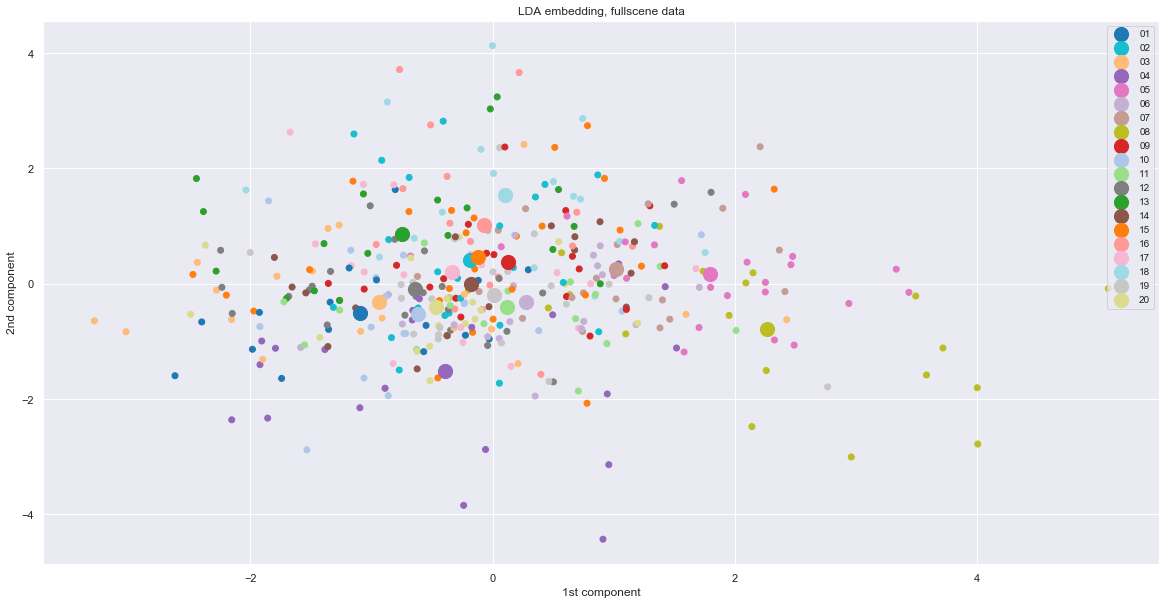

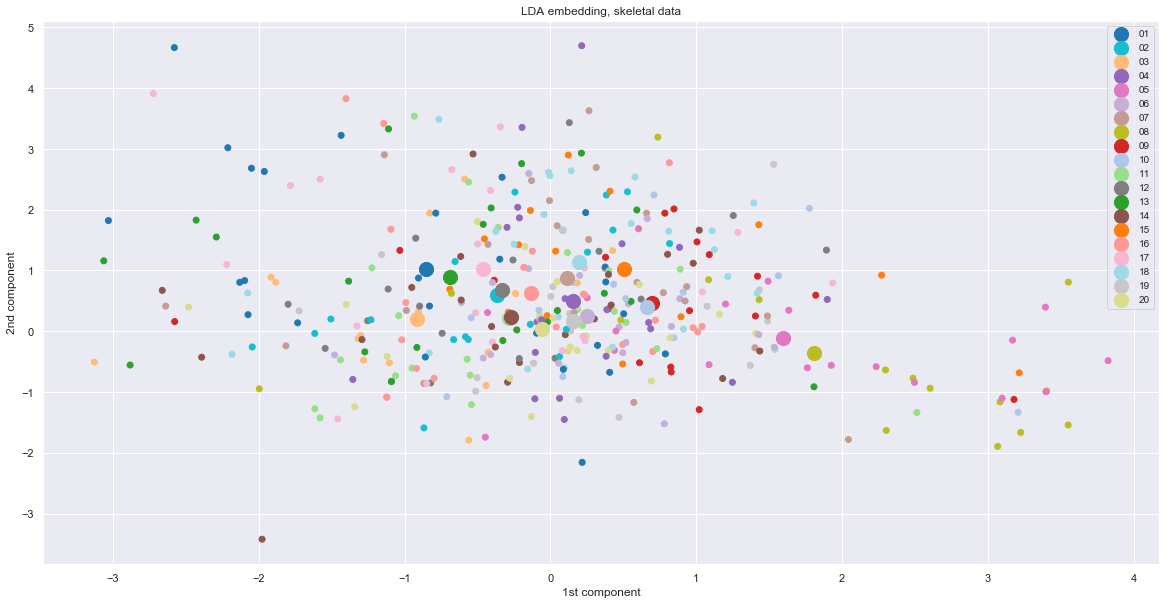

In [24]:
plot_embedding(fullscene_lda, fullscene_labels,fullscene_means_lda, fullscene_means.index, title="LDA embedding, fullscene data", three_d=False)
plot_embedding(skel_lda, skel_labels,skel_means_lda, skel_means.index, title="LDA embedding, skeletal data", three_d=False)

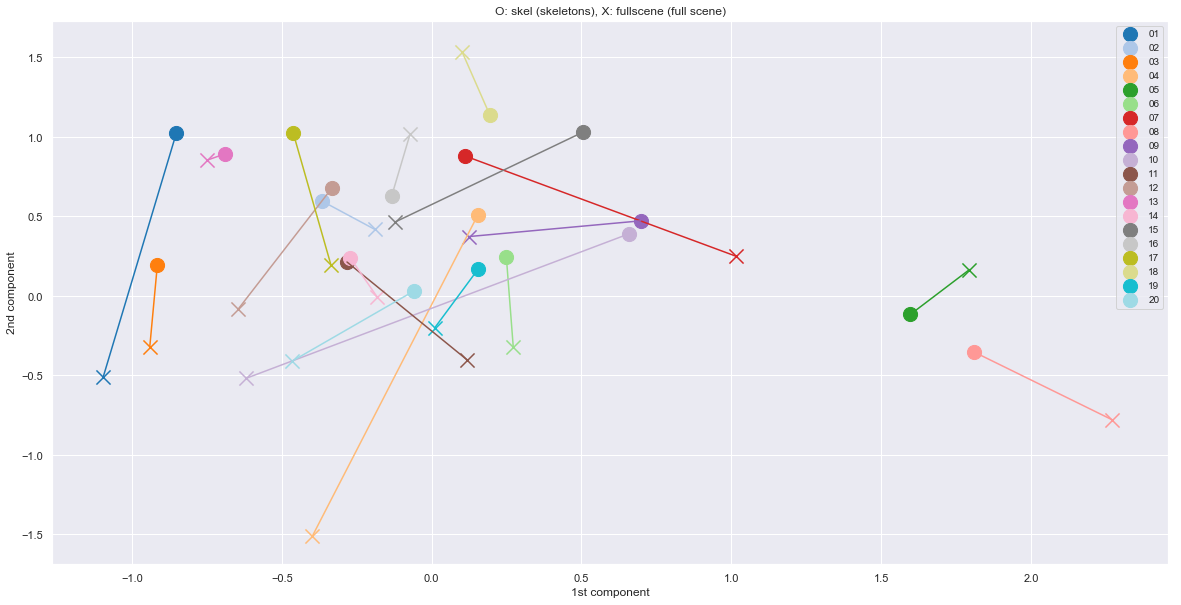

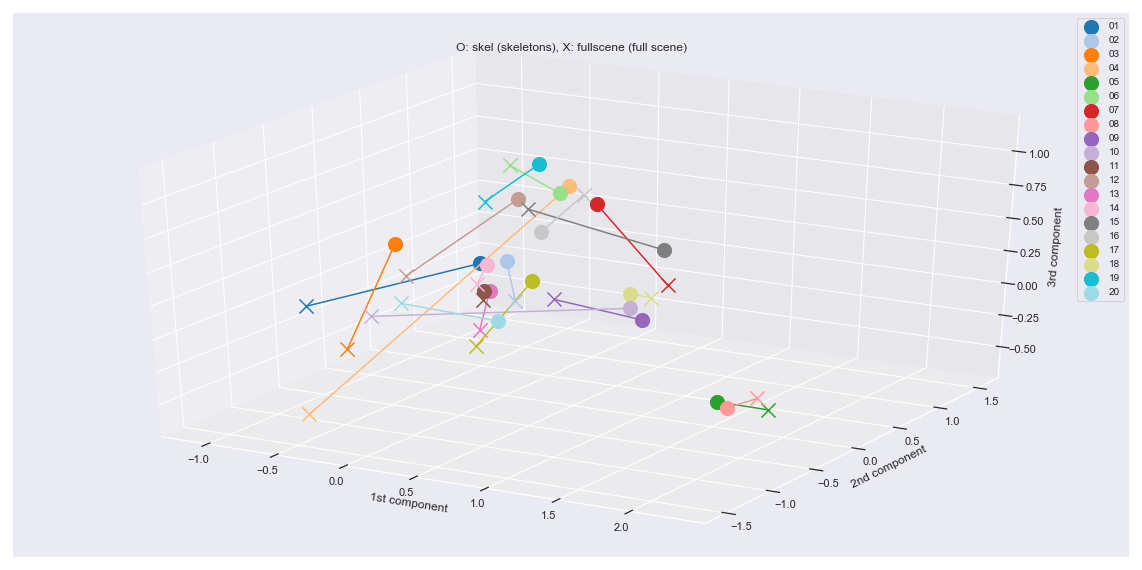

In [25]:
plot_compare_embeddings(skel_means_lda, fullscene_means_lda, fullscene_means.index,three_d=False)
plot_compare_embeddings(skel_means_lda, fullscene_means_lda, skel_means.index,three_d=True)

To answer the question: *does a PCA evidence common latent factors between our 2 conditions?*, we can again create a new LDA model for the skeletal data, and print out the LDA components for *fullscene* vs *skeleton* side-by-side.

We observe that they still look very different.

In [26]:
# compute as well a LDA model from the skeletal PCA to compare components with fullscene
skel_lda_model = LinearDiscriminantAnalysis(n_components=lda_nb_components, solver='svd')
skel_lda_model.fit(skel_pca, skel_labels)


fullscene_lda_components = pd.DataFrame(fullscene_lda_model.scalings_[:,:lda_nb_components].T).T
skel_lda_components = pd.DataFrame(skel_lda_model.scalings_[:,:lda_nb_components].T).T

# merge PCA components into one dataframe, skel and fullscene side-by-side
lda_components=pd.concat([fullscene_lda_components, skel_lda_components], keys=["fullscene", "skel"], axis=1)
lda_components=lda_components.swaplevel(0,1,1).sort_index(1)

show_heatmap(lda_components[abs(lda_components)>0.2], m=-0.6, M=0.6)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


By multiplying the LDA loadings matrix with the PCA loadings matrix, we can compute the LDA loadings in terms of the original questions asked to the participants.

In [27]:
lda_fullscene_loadings=pd.DataFrame(np.dot(fullscene_pca_components, fullscene_lda_components), index=pca_components.index, columns=["LDA component %d" % (i+1) for i in range(lda_nb_components)])
lda_skel_loadings=pd.DataFrame(np.dot(skel_pca_components, skel_lda_components), index=pca_components.index, columns=["LDA component %d" % (i+1) for i in range(lda_nb_components)])
# merge loadings into one dataframe, skel and fullscene side-by-side
lda_loadings=pd.concat([lda_fullscene_loadings, lda_skel_loadings], keys=["fullscene","skel"], axis=1)
lda_loadings=lda_loadings.swaplevel(0,1,1).sort_index(1)

from scipy.stats import pearsonr

print("Pearson correlation between LDA components 'fullscene' vs 'skeletal'")
for i in range(1, lda_nb_components + 1):
    r, p=pearsonr(lda_loadings["LDA component %d" % i]["fullscene"].values, lda_loadings["LDA component %d" % i]["skel"].values)
    print("LDA component %d: r=%f, p=%f" % (i,r,p)) 


show_heatmap(lda_loadings[abs(lda_loadings)>=0.1], m=-0.6, M=0.6)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Pearson correlation between LDA components 'fullscene' vs 'skeletal'
LDA component 1: r=0.963956, p=0.000000
LDA component 2: r=-0.336108, p=0.093196
LDA component 3: r=-0.552121, p=0.003451
LDA component 4: r=-0.316252, p=0.115494


## Explorative Factor Analysis

The Python [factor_analyzer](https://factor-analyzer.readthedocs.io) module is a port of EFA from the R' `psych` package.

In [28]:
import factor_analyzer

rotation = 'promax'

nb_factors=3

fa_fullscene = factor_analyzer.FactorAnalyzer()
fa_fullscene.analyze(fullscene_ratings_df, nb_factors, rotation=rotation)
fullscene_loadings=fa_fullscene.loadings

fa_skel = factor_analyzer.FactorAnalyzer()
fa_skel.analyze(skel_ratings_df, nb_factors, rotation=rotation)
skel_loadings=fa_skel.loadings

Comparing the loadings for the *fullscene* vs the *skeletal* only data show that the first two factors are highly correlated. **This shows that, using factor analysis, we have uncovered latent constructs that are used by participants to describe the clips in both *fullscene* and *skeletal-only* conditions**.

In [29]:
# merge loadings into one dataframe, skel and fullscene side-by-side
loadings=pd.concat([fullscene_loadings, skel_loadings], keys=["fullscene","skel"], axis=1)
loadings=loadings.swaplevel(0,1,1).sort_index(1)

from scipy.stats import pearsonr

print("Pearson correlation between factors 'fullscene' vs 'skeletal'")
for i in range(1, nb_factors+1):
    r, p=pearsonr(loadings["Factor%d" % i]["fullscene"].values, loadings["Factor%d" % i]["skel"].values)
    print("Factor %d: r=%f, p=%f" % (i,r,p)) 
    
    
show_heatmap(loadings[abs(loadings)>=0.3])


Pearson correlation between factors 'fullscene' vs 'skeletal'
Factor 1: r=0.937367, p=0.000000
Factor 2: r=0.835589, p=0.000000
Factor 3: r=0.809878, p=0.000001


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


constructs=["Dominant", "Cooperative", "Competitive", "Friendly", "Aggressive", "Engaged", "Fearful", "Sad", "Content", "Angry", "Amused"]

loadings2 = pd.DataFrame()

for c in constructs:
    loadings2[c + ": diff."] = abs(loadings.T["left" + c] - loadings.T["right" + c])
    loadings2[c + ": mag."] = np.amax([abs(loadings.T["left" + c]), abs(loadings.T["right" + c])], axis=0)

show_heatmap(loadings2.T, cmap="summer_r")


In [30]:
fa_skel.get_factor_variance()


,Factor1,Factor2,Factor3
SS Loadings,4.805225,3.677328,3.590071
Proportion Var,0.184816,0.141436,0.138080
Cumulative Var,0.184816,0.326252,0.464332


In [31]:
fa_fullscene.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,3.961499,3.854104,3.598299
Proportion Var,0.152365,0.148235,0.138396
Cumulative Var,0.152365,0.300600,0.438996


### EFA embeddings

We can use the EFA space as a 'better' space to represent our clips, where the latent, composite constructs correspond to the main axis:

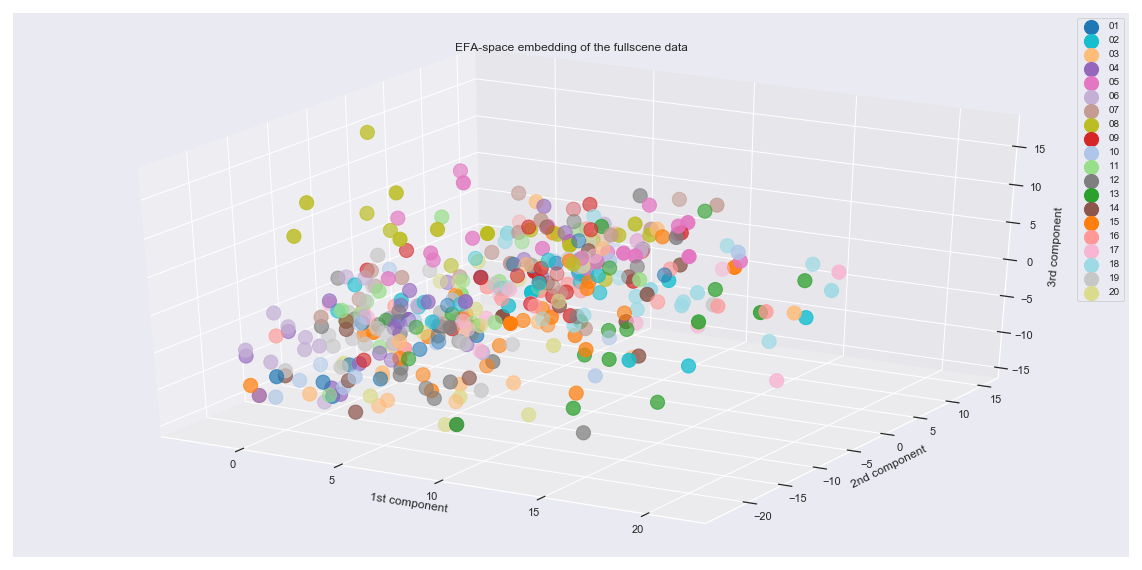

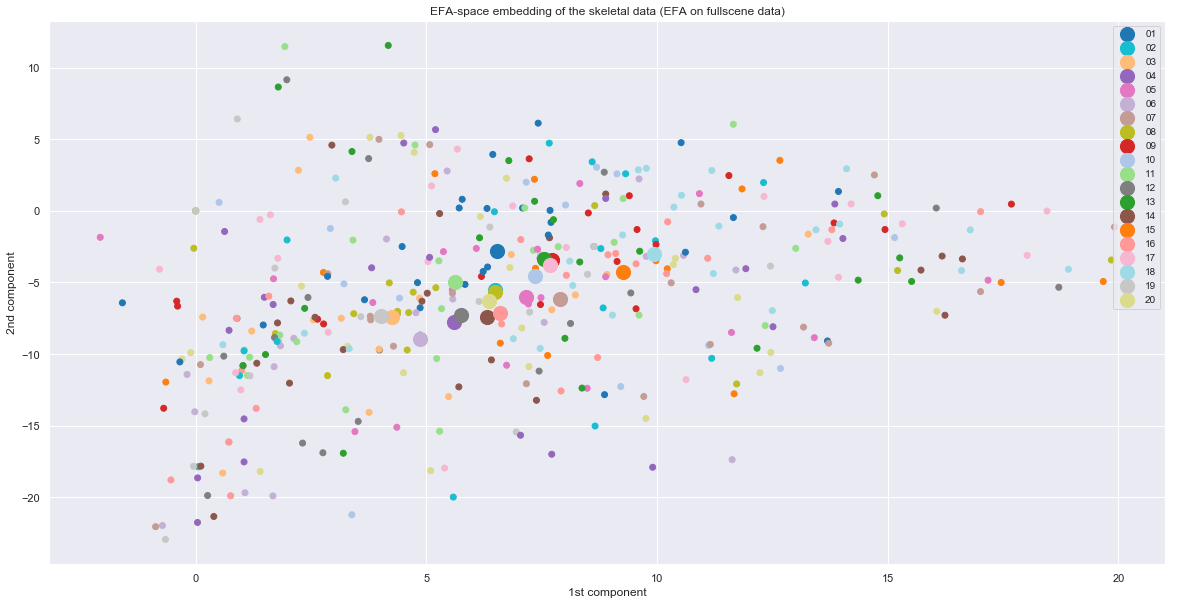

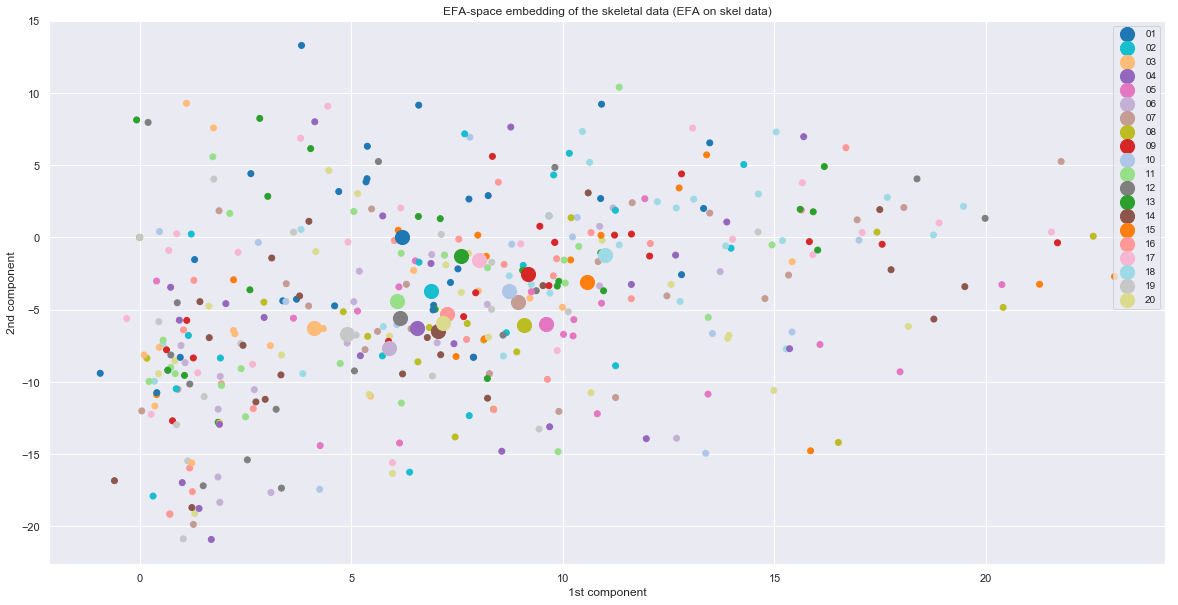

In [32]:
nb_of_factors=6
fullscene_efa = np.dot(fullscene,fullscene_loadings.values[:,:nb_of_factors])
fullscene_means_efa = np.dot(fullscene_means,fullscene_loadings.values[:,:nb_of_factors])
skel_efa = np.dot(skel,fullscene_loadings.values[:,:nb_of_factors])
skel_means_efa = np.dot(skel_means,fullscene_loadings.values[:,:nb_of_factors])

skel_pure_efa = np.dot(skel,skel_loadings.values[:,:nb_of_factors])
skel_pure_means_efa = np.dot(skel_means,skel_loadings.values[:,:nb_of_factors])


plot_embedding(fullscene_efa, fullscene_labels,fullscene_means_efa, fullscene_means.index, title="EFA-space embedding of the fullscene data", three_d=True)
plot_embedding(skel_efa, skel_labels,skel_means_efa, skel_means.index, title="EFA-space embedding of the skeletal data (EFA on fullscene data)", three_d=False)
plot_embedding(skel_pure_efa, skel_labels,skel_pure_means_efa, skel_means.index, title="EFA-space embedding of the skeletal data (EFA on skel data)", three_d=False)


Interestingly, even if the EFA factors are quite similar, the distances between same clips in fullscene vs skeletal data are higher in the EFA space compared to the PCA or LDA space:

In [33]:
distances_efa=pd.DataFrame(np.power(np.sum(np.power(skel_means_efa - fullscene_means_efa, 2), axis=1), 0.5), index=skel_means.index, columns=["distance_efa"])

distances = pd.concat([distances_pca, distances_lda, distances_efa], axis=1)
print("Mean distances:\n%s" % distances.mean(axis=0))
show_heatmap(distances, cmap="summer_r")


Mean distances:
distance_pca    2.292290
distance_lda    0.948686
distance_efa    3.428116
dtype: float64


,distance_pca,distance_lda,distance_efa
clipId,,,
01,4.65382,1.78732,6.67003
02,0.883654,0.350891,1.64351
03,1.73115,1.03464,1.98804
04,4.40108,2.42992,4.6131
05,1.2188,0.486269,2.23726
06,2.3967,0.679606,4.56893
07,2.65566,1.27701,4.53029
08,1.57035,0.72836,1.74438
09,1.54301,0.63264,2.6114


# Clustering



Based on the distance measurements, the LDA space seems to be the best to cluster our clips.
We can then attempt to cluster our 20 clips into 'groups' of similar clips (based on the latent constructs):

,cluster #
clipId,
02,0
17,0
16,0
09,0
04,1
06,1
05,2
08,2
01,3


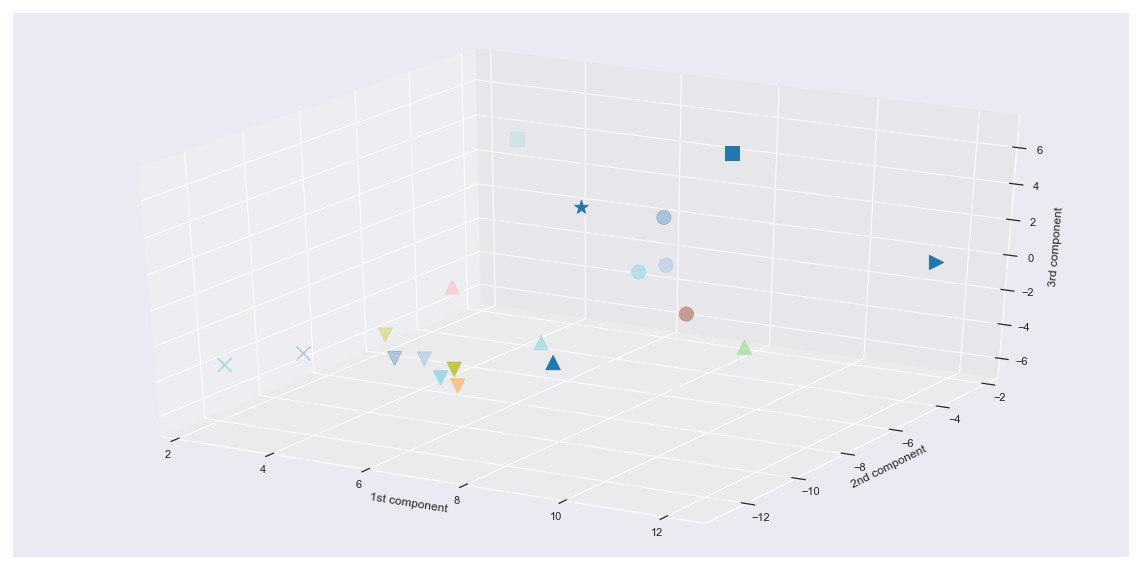

In [34]:
from sklearn.cluster import KMeans

# kMeans clustering after projecting our clips in the EFA-space
fullscene_clustering_data=fullscene_means_efa

nb_clusters=7

fullscene_kmeans_model = KMeans(n_clusters=nb_clusters, random_state=0).fit(fullscene_clustering_data)
fullscene_kmeans = fullscene_kmeans_model.predict(fullscene_clustering_data)

plot_embedding(fullscene_clustering_data,fullscene_means.index,clusters=fullscene_kmeans, three_d=True)

pd.DataFrame(fullscene_kmeans, index=fullscene_means.index, columns=["cluster #"]).sort_values(by="cluster #")



We should be able to infer the semantics of the 3 first EFA factors.


We can then try to predict in which cluster the clips would end up, using only the ratings from the skeletal videos:

In [35]:
skel_means_efa.shape

(20, 3)

7 skeleton clips out of 20 (35.0%) are predicted to fall into the same cluster as their 'fullscene' counterpart.


,fullscene clusters,skel clusters,same,kripp alpha std,kripp alpha mean,alpha(fullscene),alpha(skel)
clipId,,,,,,,
09,0,4,False,0.0280486,0.0776562,0.0974896,0.0578229
07,4,5,False,0.102169,0.163664,0.0914201,0.235908
02,0,5,False,0.063052,0.225305,0.18072,0.269889
17,0,0,True,0.0633495,0.227733,0.272528,0.182938
16,0,5,False,0.0567452,0.232099,0.191974,0.272224
10,3,4,False,0.219404,0.241284,0.396426,0.0861424
11,5,0,False,0.0326347,0.257414,0.280491,0.234338
13,5,0,False,0.10236,0.261617,0.333996,0.189237
05,2,2,True,0.0314335,0.305662,0.327889,0.283435


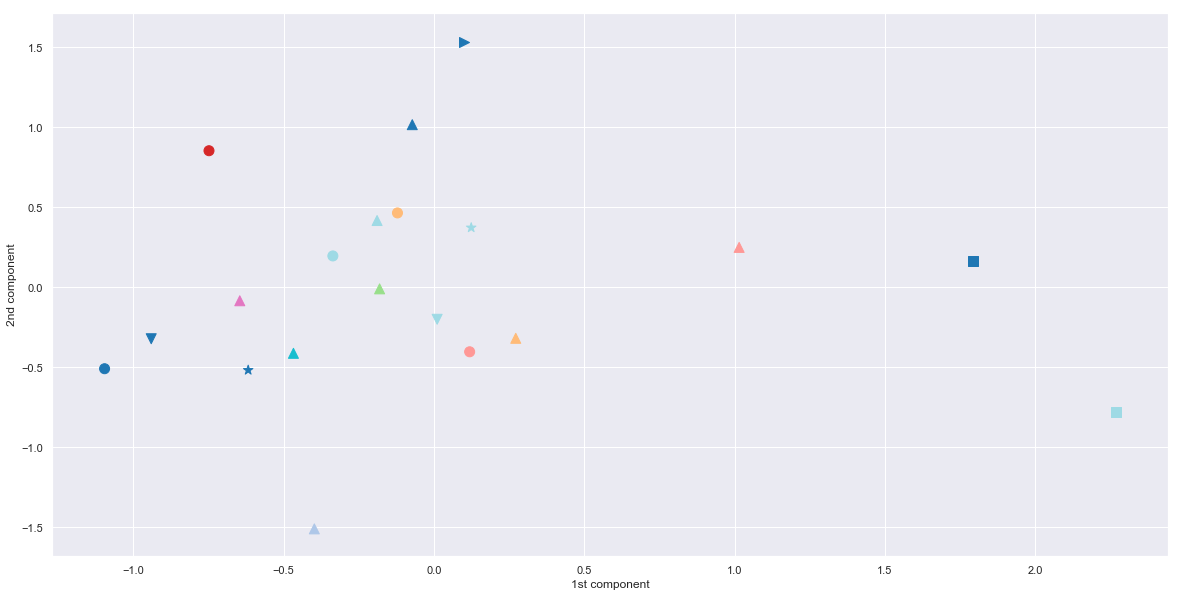

In [39]:
skel_kmeans= fullscene_kmeans_model.predict(skel_means_efa)

plot_embedding(fullscene_means_lda, skel_means.index, clusters=skel_kmeans, three_d=False)

diff=pd.DataFrame(fullscene_kmeans-skel_kmeans,index=skel_means.index)
print("%d skeleton clips out of %d (%.1f%%) are predicted to fall into the same cluster as their 'fullscene' counterpart." % (diff[diff==0].count(), skel_kmeans.size, diff[diff==0].count() * 100. / skel_kmeans.size))

clusters_kripp=pd.DataFrame([fullscene_kmeans, skel_kmeans, fullscene_kmeans==skel_kmeans,krippendorff_df[["alpha(fullscene)", "alpha(skel)"]].std(axis=1).astype(float), krippendorff_df[["alpha(fullscene)", "alpha(skel)"]].mean(axis=1).astype(float), krippendorff_df["alpha(fullscene)"], krippendorff_df["alpha(skel)"], ],index=["fullscene clusters", "skel clusters", "same", "kripp alpha std", "kripp alpha mean", "alpha(fullscene)", "alpha(skel)"],columns=skel_means.index).T.sort_values(by="kripp alpha mean")
clusters_kripp

Is there a correlation between 'same clusters' and Krippendorf agreement (ie, consistency of ratings for a given clip)? No...

In [40]:
print("Mean Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].mean())
print("Std Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].std())
print("Mean Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].mean())
print("Std Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].std())

Mean Krippendorf, same cluster: 0.320151
Std Krippendorf, same cluster: 0.048791
Mean Krippendorf, diff cluster: 0.273490
Std Krippendorf, diff cluster: 0.089409


# Classification



Training a multi-label classifier on our clips

In [41]:
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer



training_ground_truth = { '01': ['Aggressive'],
                         '02': ['Excited', 'Aggressive', 'Aimless'],
                         '03': ['Excited', 'Fun'],
                         '04': ['Cooperative'],
                         '05': ['Bored', 'Aimless'],
                         '06': ['Cooperative'],
                         '07': ['Dominant'],
                         '08': ['Bored', 'Fun'],
                         '09': ['Cooperative'],
                         '10': ['Cooperative', 'Dominant'],
                         '11': ['Cooperative', 'Dominant'],
                         '12': ['Aggressive', 'Aimless'],
                         '13': ['Excited', 'Aggressive', 'Aimless'],
                         '14': ['Aggressive'],
                         '15': ['Dominant'],
                         '16': ['Cooperative', 'Dominant'],
                         '17': ['Excited', 'Aggressive'],
                         '18': ['Aggressive', 'Dominant'],
                         '19': ['Dominant'],
                         '20': ['Excited']}

mlb = MultiLabelBinarizer()
mlb.fit(training_ground_truth.values())

def datasets(training=df, testing=None, cols=allQuestions, test_size=0.2, use_clip_id_as_label=False, random_labels=False):
    """Returns a training dataset and training labels, and a testing dataset and testing labels.
    
    If testing is None, it randomly splits the training dataframe (at test_size).
    """


    if testing is None:
        
        if use_clip_id_as_label:
            labels = list(training["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

        data = training[cols].values

        training_data, testing_data, training_labels, testing_labels = train_test_split(data, labels, test_size=test_size, random_state=int(time.time()))

        if not use_clip_id_as_label:
            
            training_labels, testing_labels = mlb.transform(training_labels), mlb.transform(testing_labels)
            
            if random_labels:
                for labels in testing_labels:
                    np.random.shuffle(labels)                 
                np.random.shuffle(testing_labels)             
            

        return training_data, testing_data, training_labels, testing_labels
    
    else:
        
        if use_clip_id_as_label:
            training_labels = list(training["clipId"].map(int))
            testing_labels = list(testing["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

            training_labels = mlb.transform(labels)

            labels = []
            for id in testing["clipId"]:
                labels.append(training_ground_truth[id])

            testing_labels = mlb.transform(labels)

            if random_labels:
                if random_labels:
                    for labels in testing_labels:
                        np.random.shuffle(labels)                 
                    np.random.shuffle(testing_labels) 

        
        training_data = training[cols].values
        testing_data = testing[cols].values

        return training_data, testing_data, training_labels, testing_labels

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

def train(training_data, training_labels):
    
    #clf = RandomForestClassifier()
    #clf = KNeighborsClassifier(n_neighbors=3)
    #clf = ExtraTreeClassifier(random_state=0)
    
    layers_nb = 3
    layer_size = 20

    layers = (layer_size, ) * layers_nb
    print("Training a MLP classifier, layers: %s..." % str(layers))

    # => naively using a OneVsRestClassifier does not improve the classification results, on the contrary
    #clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=1000, solver="lbfgs"))
    
    clf = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=1000, solver="lbfgs")
    clf.fit(training_data, training_labels)
    
    return clf

def predict(clf, testing_data, inverse_transform_labels=True):
    p = clf.predict(testing_data)
    if inverse_transform_labels:
        return mlb.inverse_transform(p) 
    else:
        return p

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [54]:
import sklearn
import sklearn.metrics as metrics

def run_classification(training, testing=None, cols=allQuestions, use_clip_id_as_label=False, random_labels=False, iterations=50):
    """
    Metrics for multi-label classification coming form Sorower, Mohammad S. "A literature survey on algorithms for multi-label learning." Oregon State University, Corvallis (2010).
    """
    
    results = {"exact": [],
               "accuracy" : [],
               "precision": [],
               "recall": [],
              "f1_measure": [],
              "weighted_precision": [],
              "hamming_loss": []}
    labels_precision = []
    labels_f1 = []
    

    for x in range(iterations):
        print("Round %d/%d" % (x+1, iterations))
        training_data, testing_data, training_labels, testing_labels = datasets(training=training, testing=testing, cols=allQuestions, use_clip_id_as_label=use_clip_id_as_label, random_labels=random_labels)
        
        if iterations == 1:
            print("Shape of training data: %s" % str(training_data.shape))
            print("Shape of testing data: %s" % str(testing_data.shape))

        clf = train(training_data, training_labels)

        #mean_score_exact += clf.score(testing_data, testing_labels)

        pred_labels = predict(clf, testing_data, inverse_transform_labels = not use_clip_id_as_label)


        
        at_least_one = 0
        at_least_one_no_incorrect = 0
        
        if not use_clip_id_as_label:
            
            nb_classes = len(mlb.classes_)
            
            labels_precision.append(dict(zip(mlb.classes_, metrics.precision_score(testing_labels, mlb.transform(pred_labels), average=None))))
            labels_f1.append(dict(zip(mlb.classes_, metrics.f1_score(testing_labels, mlb.transform(pred_labels), average=None))))
            results["weighted_precision"].append(metrics.precision_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            results["hamming_loss"].append(metrics.hamming_loss(testing_labels, mlb.transform(pred_labels)))    
            #mean_precision += metrics.accuracy_score(testing_labels, mlb.transform(pred_labels))
            
            testing_labels = mlb.inverse_transform(testing_labels)
            
            exact = 0
            accuracy = 0
            precision = 0
            recall = 0
            f1_measure = 0
            
            for actual, pred in zip(testing_labels, pred_labels):
                
                pred = set(pred)
                actual = set(actual)
                
                if len(pred) == 0: continue
                    
                if pred == actual:
                    #print("%s <-> %s" % (actual, pred))
                    exact += 1
                    
                intersection = pred.intersection(actual)
                union = pred.union(actual)

                accuracy += float(len(intersection)) / len(union)
                precision += float(len(intersection)) / len(pred)
                recall += float(len(intersection)) / len(actual)
                f1_measure += 2 * float(len(intersection)) / (len(pred) + len(actual))
                
            
            results["exact"].append(float(exact) / len(testing_labels))
            results["accuracy"].append(accuracy / len(testing_labels))
            results["precision"].append(precision / len(testing_labels))
            results["recall"].append(recall / len(testing_labels))
            results["f1_measure"].append(f1_measure / len(testing_labels))
            
            
            
        else: # use_clip_id_as_label = True
            # does not make much sense as at_least_one & at_least_one_no_incorrect are the same as 'exact'
            pass

    return pd.DataFrame(results), pd.DataFrame(labels_precision), pd.DataFrame(labels_f1)

### Fullscene classification - 80%/20% split - multi-label

In [66]:
results,labels_precision_fs,labels_f1_fs = run_classification(fullscene_df, iterations=20)
results.describe()

Round 1/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 2/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 3/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 4/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 5/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 6/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 7/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 8/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 9/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 10/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 11/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 12/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 13/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 14/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 15/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 16/20
Training a MLP classifier, layers: (20, 20, 20)...
R

,exact,accuracy,precision,recall,f1_measure,weighted_precision,hamming_loss
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.149375,0.306187,0.367865,0.402604,0.361568,0.409432,0.286250
std,0.045609,0.047603,0.059847,0.049170,0.050157,0.049142,0.021241
min,0.075000,0.222917,0.281250,0.310417,0.271250,0.328484,0.237500
25%,0.121875,0.283594,0.336719,0.372396,0.334583,0.379660,0.274107
50%,0.143750,0.294792,0.354167,0.401042,0.351399,0.399247,0.292857
75%,0.178125,0.333177,0.382552,0.427604,0.388646,0.443047,0.303125
max,0.250000,0.414583,0.510417,0.497917,0.475417,0.515464,0.314286


In [67]:
labels_precision_fs.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.461449,0.341797,0.605744,0.372533,0.416299,0.359522,0.251611
std,0.107163,0.094446,0.198102,0.108426,0.118530,0.073831,0.120261
min,0.272727,0.157895,0.272727,0.222222,0.238095,0.185185,0.111111
25%,0.398485,0.276667,0.448052,0.283088,0.344780,0.333333,0.153846
50%,0.434286,0.330966,0.612500,0.377976,0.403125,0.367003,0.190909
75%,0.521025,0.413961,0.750000,0.471989,0.468750,0.396495,0.340909
max,0.758621,0.500000,1.000000,0.608696,0.647059,0.535714,0.500000


In [69]:
labels_f1_fs.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.482456,0.365297,0.585173,0.348896,0.384747,0.371916,0.241719
std,0.094522,0.086445,0.167453,0.100586,0.092320,0.074961,0.091970
min,0.321429,0.157895,0.285714,0.208333,0.205128,0.243902,0.125000
25%,0.425202,0.321429,0.460084,0.277778,0.327087,0.333333,0.166667
50%,0.479224,0.379332,0.571429,0.344444,0.396429,0.373400,0.228758
75%,0.509231,0.415800,0.676471,0.412505,0.447917,0.413475,0.301923
max,0.733333,0.512821,0.888889,0.571429,0.530612,0.576923,0.421053


### Fullscene classification - 80%/20% split - multi-label - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

In [70]:
results_chance,labels_precision_fschance,labels_f1_fschance = run_classification(fullscene_df, random_labels=True, iterations=20)
results_chance.describe()

Round 1/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 2/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 3/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 4/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 5/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 6/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 7/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 8/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 9/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 10/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 11/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 12/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 13/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 14/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 15/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 16/20
Training a MLP classifier, layers: (20, 20, 20)...
R

,exact,accuracy,precision,recall,f1_measure,weighted_precision,hamming_loss
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.032500,0.171771,0.231146,0.268646,0.229464,0.254775,0.359286
std,0.020439,0.025920,0.028322,0.034169,0.028980,0.031613,0.016270
min,0.000000,0.125833,0.187500,0.216667,0.181250,0.191235,0.335714
25%,0.012500,0.150469,0.208854,0.241667,0.209583,0.245194,0.349107
50%,0.025000,0.172292,0.235937,0.261458,0.232560,0.255582,0.358036
75%,0.050000,0.186771,0.248698,0.294271,0.244896,0.263898,0.363839
max,0.075000,0.228125,0.285417,0.347917,0.296250,0.317192,0.401786


In [71]:
labels_precision_fschance.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.248220,0.244671,0.252503,0.280487,0.232573,0.253573,0.207522
std,0.065917,0.101662,0.163414,0.111838,0.077941,0.084096,0.100698
min,0.136364,0.062500,0.000000,0.142857,0.090909,0.115385,0.000000
25%,0.209918,0.191850,0.138393,0.184524,0.179221,0.197619,0.138393
50%,0.241212,0.236111,0.250000,0.248246,0.214756,0.239048,0.190909
75%,0.270889,0.296675,0.340909,0.382937,0.271923,0.303922,0.297619
max,0.380952,0.500000,0.571429,0.454545,0.379310,0.391304,0.363636


In [72]:
labels_f1_fschance.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.292241,0.251023,0.145462,0.300864,0.270418,0.274205,0.139771
std,0.071927,0.098780,0.094410,0.103022,0.077569,0.083296,0.079260
min,0.157895,0.068966,0.000000,0.171429,0.090909,0.129032,0.000000
25%,0.245640,0.198077,0.070813,0.205128,0.216828,0.203846,0.079231
50%,0.288148,0.235327,0.148352,0.273619,0.280112,0.288690,0.119048
75%,0.325106,0.308261,0.201724,0.375844,0.306633,0.333333,0.185924
max,0.448980,0.514286,0.342857,0.500000,0.407407,0.461538,0.272727


### Fullscene training; skeleton testing - multi-labels

In [73]:
results,labels_precision_sk,labels_f1_sk = run_classification(fullscene_df, testing=skel_df, iterations=20)
results.describe()

Round 1/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 2/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 3/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 4/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 5/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 6/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 7/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 8/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 9/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 10/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 11/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 12/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 13/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 14/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 15/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 16/20
Training a MLP classifier, layers: (20, 20, 20)...
R

,exact,accuracy,precision,recall,f1_measure,weighted_precision,hamming_loss
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.145375,0.303006,0.360223,0.405667,0.359772,0.380961,0.295482
std,0.016489,0.016712,0.020201,0.021254,0.018669,0.019480,0.009904
min,0.120000,0.277708,0.331042,0.372917,0.330167,0.344749,0.276786
25%,0.134375,0.290115,0.345052,0.393542,0.348414,0.368460,0.289554
50%,0.141250,0.303438,0.359792,0.401875,0.356881,0.380526,0.296607
75%,0.158125,0.311844,0.369323,0.416250,0.372083,0.393036,0.301071
max,0.177500,0.345083,0.411667,0.464167,0.411667,0.423360,0.314643


In [74]:
labels_precision_sk.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.465289,0.276675,0.614165,0.329981,0.382409,0.351399,0.256608
std,0.039376,0.033170,0.052910,0.029701,0.013600,0.052578,0.067991
min,0.400000,0.223529,0.533333,0.264957,0.350515,0.279070,0.161290
25%,0.434248,0.253479,0.562071,0.305897,0.375446,0.313492,0.221354
50%,0.468362,0.270077,0.620813,0.333347,0.383570,0.342189,0.250000
75%,0.489007,0.308801,0.656473,0.347991,0.390924,0.389537,0.300758
max,0.536000,0.333333,0.687500,0.384615,0.406250,0.436620,0.454545


In [75]:
labels_f1_sk.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.400168,0.283711,0.616330,0.372949,0.441673,0.300605,0.235681
std,0.036217,0.035130,0.030109,0.037508,0.021667,0.048392,0.053820
min,0.346774,0.234568,0.560000,0.264957,0.405405,0.228916,0.135593
25%,0.373683,0.253021,0.592287,0.347585,0.426542,0.252976,0.201723
50%,0.402219,0.279659,0.615490,0.379190,0.442422,0.297435,0.241379
75%,0.417094,0.316610,0.641138,0.392419,0.454176,0.340483,0.265945
max,0.489051,0.344828,0.675325,0.443709,0.475904,0.381443,0.350877


### Fullscene training; skeleton testing - multi-labels - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

In [76]:
results,labels_precision_skchance,labels_f1_skchance = run_classification(fullscene_df, testing=skel_df, random_labels=True, iterations=20)
results.describe()

Round 1/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 2/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 3/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 4/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 5/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 6/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 7/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 8/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 9/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 10/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 11/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 12/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 13/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 14/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 15/20
Training a MLP classifier, layers: (20, 20, 20)...
Round 16/20
Training a MLP classifier, layers: (20, 20, 20)...
R

,exact,accuracy,precision,recall,f1_measure,weighted_precision,hamming_loss
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.035375,0.160558,0.222344,0.237833,0.212983,0.236475,0.361214
std,0.009810,0.011778,0.013045,0.017054,0.013519,0.014734,0.008119
min,0.020000,0.139042,0.195833,0.202917,0.188262,0.209027,0.346071
25%,0.026875,0.153156,0.211615,0.228021,0.207000,0.226810,0.357589
50%,0.036250,0.159854,0.222812,0.236875,0.210982,0.234801,0.360893
75%,0.040625,0.170333,0.232031,0.250104,0.224750,0.244419,0.365804
max,0.055000,0.184583,0.247500,0.267500,0.241845,0.270514,0.380714


In [77]:
labels_precision_skchance.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.240598,0.246857,0.231687,0.224518,0.231451,0.226700,0.237379
std,0.031546,0.044687,0.075843,0.033663,0.039496,0.072749,0.076079
min,0.187500,0.152941,0.125000,0.139860,0.127660,0.126984,0.115385
25%,0.220335,0.226834,0.179221,0.208945,0.210804,0.168427,0.189063
50%,0.241004,0.242188,0.214559,0.225120,0.236157,0.210669,0.237903
75%,0.262893,0.269677,0.285714,0.241475,0.255853,0.268825,0.293837
max,0.300885,0.325843,0.428571,0.279762,0.287179,0.360000,0.370370


In [78]:
labels_f1_skchance.describe()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.256763,0.214888,0.127826,0.282906,0.304707,0.198450,0.126454
std,0.037458,0.038050,0.040552,0.044908,0.046259,0.064262,0.045986
min,0.195652,0.146067,0.065574,0.174672,0.183206,0.105960,0.051282
25%,0.230124,0.185132,0.095238,0.260675,0.280771,0.146453,0.096498
50%,0.245143,0.212935,0.116304,0.285216,0.294718,0.184735,0.113514
75%,0.284357,0.229860,0.154767,0.305583,0.339102,0.255898,0.162300
max,0.330097,0.316940,0.222222,0.357143,0.384880,0.312139,0.206452


In [45]:
clf_clusters = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', max_iter=1000, solver="lbfgs")

# trying with skel, skel_pca, skel_lda do not lead to any clear improvements
training_set = fullscene_lda

training_labels = []

for id in fullscene_df["clipId"]:
    training_labels.append(fullscene_kmeans[int(id)-1])

testing_labels = []

for id in range(20):
    testing_labels.append(fullscene_kmeans[int(id)-1])

testing_set = skel_means_lda


clf_clusters.fit(training_set, training_labels)

print("Full scene clusters:    " + str(fullscene_kmeans))
print("Predicted clusters skel:" + str(clf_clusters.predict(testing_set)))

clf_clusters.score(testing_set, testing_labels)

Full scene clusters:    [3 0 3 1 2 1 4 2 0 3 5 3 5 5 5 0 0 6 3 3]
Predicted clusters skel:[0 2 3 2 0 6 0 3 5 5 3 0 0 3 5 0 0 2 6 3]


0.25

In [46]:
skel_df[allQuestions].values[5]

array([ 0,  4,  0,  4,  0, -4,  0,  2,  0, -4,  0,  0,  0,  4,  0,  4,  0,
       -4,  0,  4,  0, -4,  0, -4,  0, -4,  0, -4,  0, -4], dtype=int64)

In [46]:
skel_means_efa

array([[ 6.5243701 , -2.82592825, -2.69152617],
       [ 6.49286538, -5.53580762, -2.69512262],
       [ 4.24539885, -7.44701593, -5.15135179],
       [ 5.59440779, -7.77522936, -1.91442379],
       [ 7.16954914, -5.99733848,  5.13667701],
       [ 4.85984632, -8.92956104, -2.00694793],
       [ 7.90522976, -6.17212344, -1.52516792],
       [ 6.49322413, -5.67879254,  5.88969207],
       [ 7.71941235, -3.44622641,  1.73691315],
       [ 7.35313784, -4.582332  ,  1.23802587],
       [ 5.62463077, -4.94284966, -2.33362997],
       [ 5.74494308, -7.3085919 , -3.15264579],
       [ 7.54725561, -3.37154758, -2.62938701],
       [ 6.30719727, -7.39968566, -3.04276753],
       [ 9.26700558, -4.28717442,  0.67504476],
       [ 6.59191851, -7.15109296, -2.21771065],
       [ 7.68602078, -3.77724115, -1.70230807],
       [ 9.93876351, -3.03218644,  0.33761104],
       [ 4.02038497, -7.36508348, -2.47400475],
       [ 6.35426091, -6.31172679, -1.90422423]])

Using a SVM classifier, we can try to improve our predictions:

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

# trying with skel, skel_pca, skel_lda do not lead to any clear improvements
training_set = fullscene_means_lda
training_labels = fullscene_kmeans

testing_set = skel_means_lda
# Critically, we are testing with the *fullscene_kmeans* as we want to check whether 
# we predict the same clusters as with the fullscene stimuli.
testing_labels = fullscene_kmeans

clf.fit(training_set, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
for p, l in zip(clf.predict(testing_set), testing_labels):
    print("%s (should be %s)" % (p,l))
print("SVM: %.1f%% successful prediction out of %d tested clips" % (clf.score(testing_set, testing_labels) * 100, len(testing_labels)))

0 (should be 3)
0 (should be 0)
3 (should be 3)
0 (should be 1)
2 (should be 2)
0 (should be 1)
0 (should be 4)
2 (should be 2)
0 (should be 0)
0 (should be 3)
0 (should be 5)
0 (should be 3)
0 (should be 5)
3 (should be 5)
0 (should be 5)
0 (should be 0)
0 (should be 0)
0 (should be 6)
0 (should be 3)
0 (should be 3)
SVM: 35.0% successful prediction out of 20 tested clips


Confusion matrix, without normalization


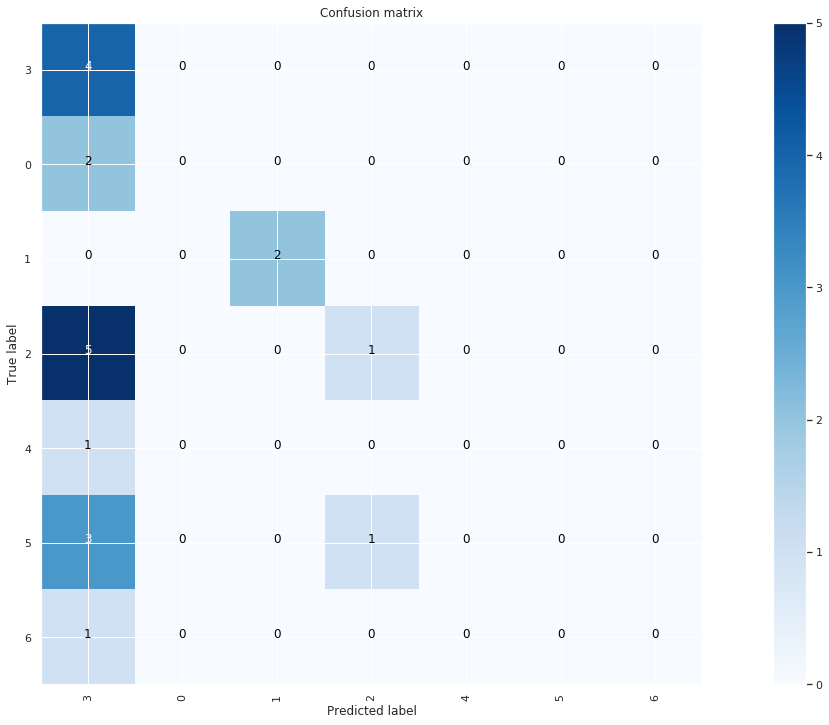

In [49]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(testing_labels, clf.predict(testing_set))
plot_confusion_matrix(cnf_matrix, classes=pd.unique(testing_labels))